# Image Processing Lab09

## Setup

In [ ]:
!apt update && apt install -y ffmpeg libsm6 libxext6
!pip install tensorflow
!pip install opencv-python
!python -m pip install -U scikit-image
!pip install -U scikit-learn
!pip install kmeans

Hit:1 http://security.debian.org/debian-security buster/updates InRelease
Hit:2 http://deb.debian.org/debian buster InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease



27 packages can be upgraded. Run 'apt list --upgradable' to see them.



ffmpeg is already the newest version (7:4.1.8-0+deb10u1).
libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.3-1+b2).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Requirement already up-to-date: scikit-image in /root/venv/lib/python3.7/site-packages (0.19.2)
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Requirement already up-to-date: scikit-learn in /shared-libs/python3.7/py/lib/python3.7/site-packages (1.0.2)
You s

## Import

In [ ]:
import numpy as np
import glob
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.feature import hog
from keras.preprocessing import image
from sklearn.cluster import KMeans
from skimage import exposure
from skimage.measure import label
from skimage import measure

## 9.1 Prepare Histogram of Gradient(HoG) feature

### 9.1.1 View hog feature of image

In [ ]:
#Load main images
main_img = cv.imread("Animals/Cats/cat10.jpg")
main_img = cv.cvtColor(main_img, cv.COLOR_BGR2RGB)
print(main_img.shape)
main_img = cv.resize(main_img , (150, 150) , interpolation=cv.INTER_AREA)

height , width , channel = main_img.shape


#Create Image Feature
  #Bluring image to reduce noise
blur = cv.GaussianBlur(main_img, (7, 7), 0)
  #Calculate HoG of image
fd,hog_image = hog(blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=-1)

(366, 500, 3)


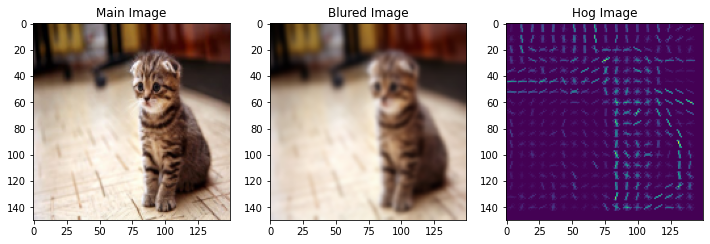

[0.19018602 0.00701043 0.00221689 ... 0.11188216 0.30518302 0.06962034]


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 10))
ax[0].imshow(main_img)
ax[0].set_title("Main Image")
ax[1].imshow(blur)
ax[1].set_title("Blured Image")
ax[2].imshow(hog_image)
ax[2].set_title("Hog Image")
plt.show()

print(fd)

### 9.1.2 Prepare hog feature of subimages

In [ ]:
# Define block size for sub image
block_size = (40, 20) # ลองอย่างน้อย 3 ค่า เช่น (40,20), (40, 30), (60, 20), (60,30), (60,40)

# Define stride
stride = (5, 5)

In [ ]:
# Define Sliding window position of row, column (Top left position)
pos_row = np.arange(0, height - block_size[0] + 1, stride[0])
pos_col = np.arange(0, width - block_size[1] + 1, stride[1])
print(pos_row)
print(pos_col)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110]
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130]


In [ ]:
# Create subimage feature
# Calculate HoG of each subimage in sliding window
hogfeatures = []

for i in range(len(pos_row)):
    for j in range(len(pos_col)):
        start_h = pos_row[i]
        end_h = pos_row[i] + block_size[0]
        start_w = pos_col[j]
        end_w = pos_col[j] + block_size[1]
        
        sub_image = main_img[start_h:end_h, start_w:end_w, :]

        
        blur = cv.GaussianBlur(sub_image,(7,7),0) #Gaussian Filtering
        fd, hog_image = hog(blur, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True, channel_axis=-1)
        
        hogfeatures.append(fd)



## 9.2 Image Segmentation using K-mean clustering

### 9.2.1 K-Mean Clustering

In [ ]:
# Clean feature if NA
hogfeatures = np.array(hogfeatures)
hogfeatures = np.nan_to_num(hogfeatures)

In [ ]:
# K-mean Clustering
N = 2
kmeans = KMeans(n_clusters=N, random_state=0)
clusters = kmeans.fit_predict(hogfeatures)
print(clusters)
print(len(clusters))

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 1 1 

### 9.2.2 Region of Interest (ROI)

In [ ]:
#Reshape clusterID result to Grid
cluster_array = clusters.reshape(len(pos_row),len(pos_col))
cluster_array.shape

(23, 27)

In [ ]:
#View Cluster_array Result
print(cluster_array)

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1]
 [0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1]
 [0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1]
 [0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0

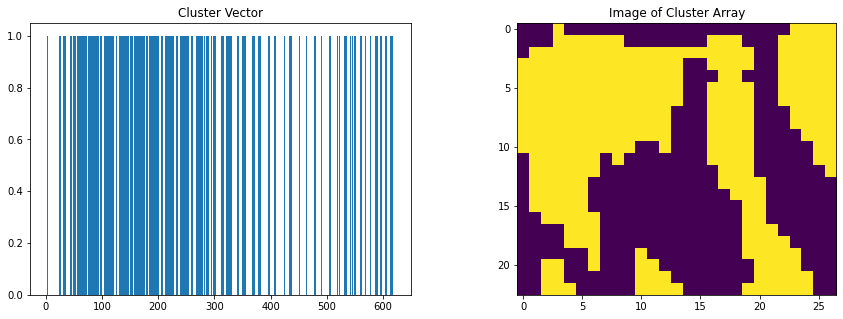

In [ ]:
result = []

for i in range(len(clusters)):
    if clusters[i]:
        result.append(i)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].hist(result, bins=max(result)-min(result) + 1)
ax[0].set_title("Cluster Vector")
ax[1].imshow(cluster_array)
ax[1].set_title("Image of Cluster Array")

plt.show()

## 9.3 ROI : Region of Interest Drawing ROI bounding box

### 9.3.1 K-Mean Clustering

In [ ]:
#ReAssign Label in case of multiple ROIs with the same clusterID
all_labels = measure.label(cluster_array)

#Define bounding box paremeter
Color = (255,0,0)
Thickness = 2

[0 1 2 3 4]


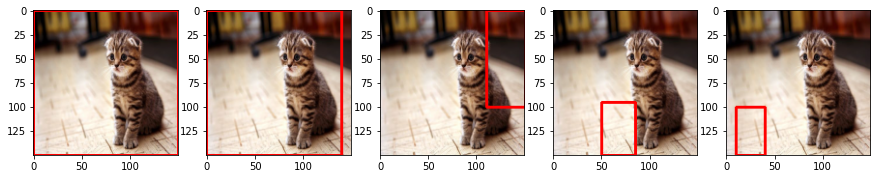

In [ ]:
#ROI bounding box
nClass = np.unique(all_labels)
print(nClass)
fig, ax = plt.subplots(nrows=1, ncols=len(nClass), figsize=(15, 15))

for i in nClass :
    #calculate form grid to actual position
    objPos = np.argwhere(all_labels == i)
    startBlockH = objPos[:,0].min()
    endBlockH = objPos[:,0].max()
    startBlockW = objPos[:,1].min()
    endBlockW = objPos[:,1].max()
    startF = (pos_col[startBlockW], pos_row[startBlockH])
    endF = (pos_col[endBlockW]+block_size[1], pos_row[endBlockH]+block_size[0])

    ROI_bounding_img = cv.rectangle(main_img.copy(), startF, endF, Color, Thickness)

    ax[i].imshow(ROI_bounding_img)

plt.show()
    


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d1fc699-edee-4571-9d76-15ad740ee69f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>